In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:
%matplotlib notebook

In [3]:
def tukey(g, h, z):
    return 1 / g * (np.exp(g * z) - 1) * np.exp(1 / 2 * h * z**2)

<IPython.core.display.Javascript object>


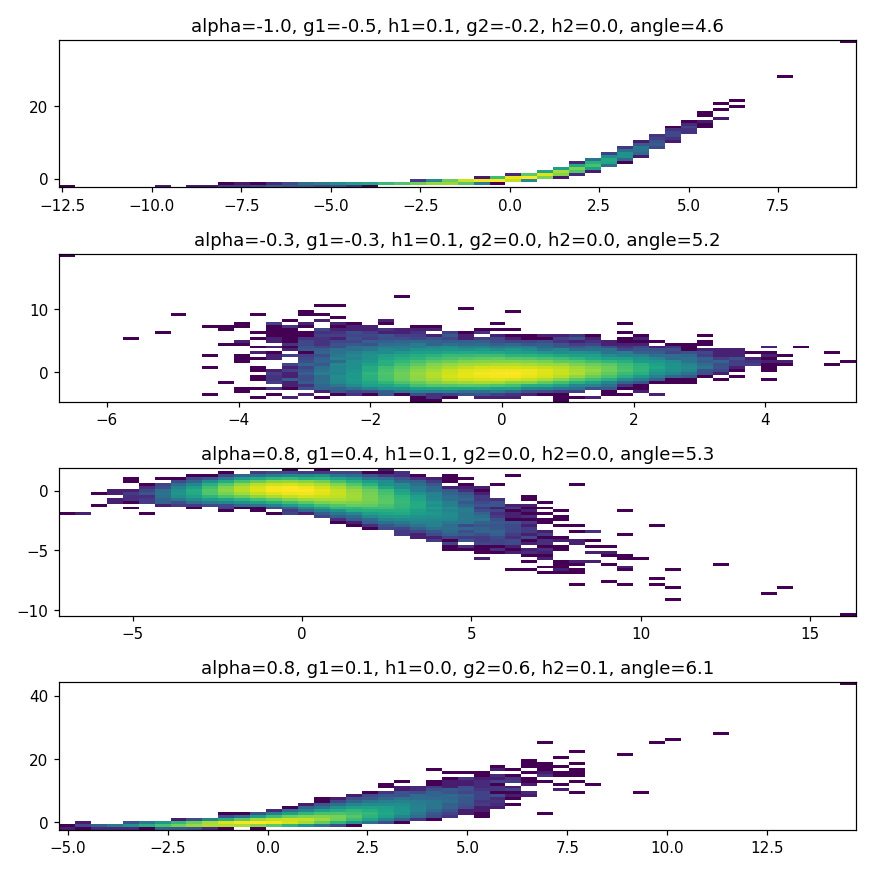

In [34]:
from scipy.linalg import inv
from numpy.random import rand
import matplotlib as mpl

plt.figure(figsize=(8, int(96 * 4. / 48)))

for i in range(4):
    plt.subplot(4, 1, i + 1)
    alpha = 2 * rand() - 1
    #alpha = 0.999
    n = 100000
    g1, g2 = 2 * rand() - 1 / 1, 2 * rand() - 1 / 1
    h1, h2 = rand() / 15, rand() / 15

    dist = multivariate_normal(np.zeros(2), [[1, alpha], [alpha, 1]])
    x, y = dist.rvs(n).T



    angle = rand() * 2 * np.pi
    A = np.array(
        [[np.cos(angle), -np.sin(angle)],
        [np.sin(angle), np.cos(angle)]]
    )
    #A = np.dot(A, np.diag([rand() * 1 - .5, rand() * 1 - .5]))
    inv_A = inv(A)
    x_tilde, y_tilde = np.zeros_like(x), np.zeros_like(y)

    for i, (x_i, y_i) in enumerate(zip(x, y)):
        u1, u2 = tukey(g1, h1, x_i), tukey(g2, h2, y_i)
        x_tilde[i], y_tilde[i] = np.dot(A, np.array([[u1], [u2]]))

    counts = plt.hist2d(x_tilde, y_tilde, bins=50, norm=mpl.colors.LogNorm())[0]
    #plt.gca().clear()
    #plt.contourf(counts)
    plt.title(f'{alpha=:.1f}, {g1=:.1f}, {h1=:.1f}, {g2=:.1f}, {h2=:.1f}, {angle=:.1f}')

plt.tight_layout()

In [35]:
np.mean(x_tilde), np.mean(y_tilde)

(0.09464941730476509, 0.35337647381393605)

## Tukey g-and-h time series 

<IPython.core.display.Javascript object>


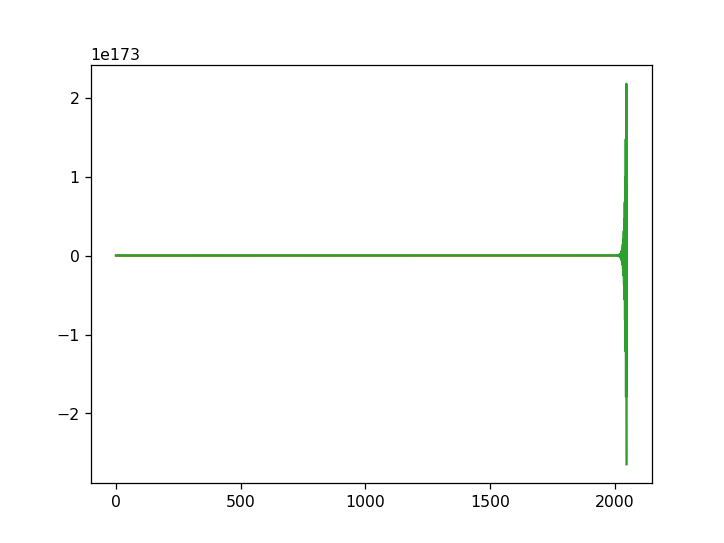

In [65]:
from scipy.linalg import inv

def exp_cov(x, rho=15, sigma=1):
    return sigma**2 * np.exp(- np.abs(x) / rho)

def cov_mat(n, cov_func):
    x = np.arange(n).reshape((-1, 1))
    d = x - x.T
    return cov_func(d)

def transform(y, g, h, k=1):
    y = y.reshape((-1, 1))
    n = y.shape[0]
    A = np.zeros((n, n))
    A[np.arange(n), np.arange(n)] = 1 / np.sqrt(1 * k + 1)
    for i in range(1, k):
        # A[np.arange(n - i), np.arange(i, n)] = 1 / (2 * k + 1)
        A[np.arange(i, n), np.arange(n - i)] = (-1)**(i+1) / k 
    t = np.dot(A, y)
    t = t / np.std(t)
    u = tukey(g, h, t) * np.std(t)
    return np.dot(inv(A), u)

cmat = cov_mat(2048, exp_cov)
g, h = 0.00001, 0.1
h2, h2 = -g, h

y = multivariate_normal(np.zeros(2048), cmat).rvs()
tt = transform(y, g, h, 2)
tt2 = transform(y, g, h, 3)

plt.figure()
plt.plot(y)
plt.plot(tt)
plt.plot(tt2)
#plt.plot(transform(y, g2, h2))



<IPython.core.display.Javascript object>


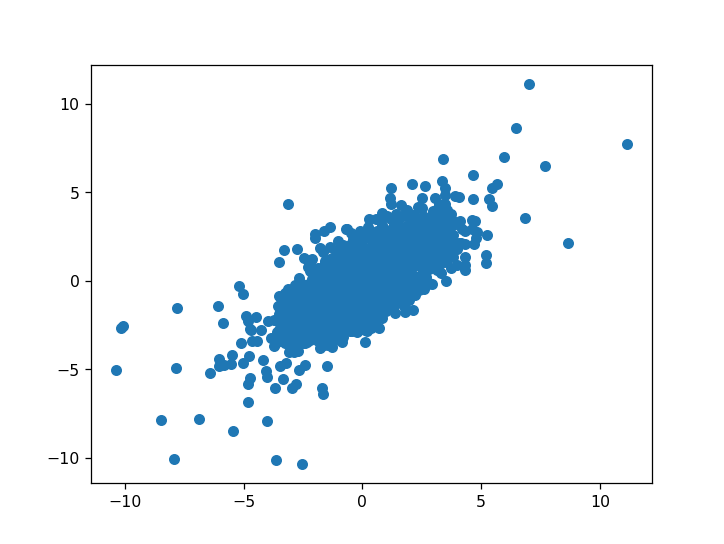

In [60]:
plt.figure()
plt.scatter(tt[:-1], tt[1:])

<IPython.core.display.Javascript object>


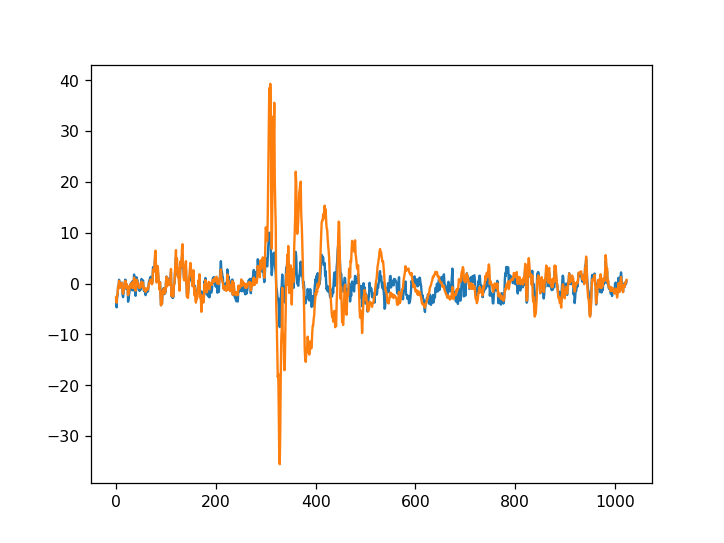

In [43]:
plt.figure()
plt.plot(transform(y, g, h))
plt.plot(transform(y, g2, h2))

<IPython.core.display.Javascript object>


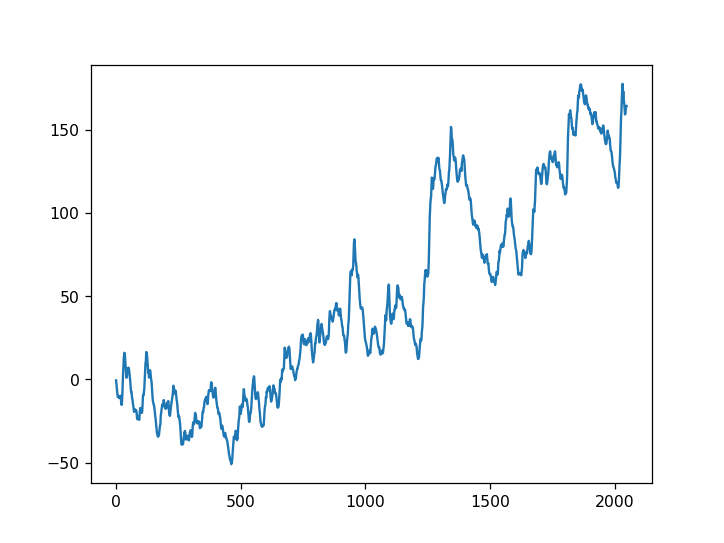

In [57]:
plt.figure()
plt.plot(np.cumsum(transform(y, g, h)))